# Web Scraping Lab

## Questions

Resident Advisor is an events listing website for electronic music.

Go to www.residentadvisor.net/events.  This is the url we'll be starting with for this lab.  For question 1, just use this url.  In the next two, you'll use country and region in the format: http://www.residentadvisor.net/country/region/ i.e. us/losangeles/.  Be sure to explore the web pages in both the browswer and the HTML file.  You'll need both to really understand what's going on.

1. Which venues are hosting events this week?
2. Make a function which returns the events this week given region and country (this will take two arguments)
    - return the event name, link, and list of artists
    - function returns list of ['event name', 'www.linkaddress.com', ['artist1','artist2','artist3']]
3. Create a function which returns the users attending 
4. Bonus


### Question 1 - Which venues are hosting events this week?

In [15]:
import requests
from bs4 import BeautifulSoup

#params: url
#return: html soup
def call_api(url):
    r = requests.get(url)
    c = r.content
    return BeautifulSoup(c, 'html.parser')
    
url = 'https://www.residentadvisor.net/events'
soup = call_api(url)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en,ja,es">
 <head id="_x1">
  <title>
   RA: Events in New Jersey, United States of America
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en,ja,es" http-equiv="content-language"/>
  <meta content="RA: Resident Advisor" name="Description"/>
  <meta content="RA, residentadvisor, resident, advisor, music, ra, events, in, new, jersey, united, states, america" name="Keywords"/>
  <meta content="Resident Advisor" name="Author"/>
  <meta content="Resident Advisor" property="og:site_name"/>
  <meta content="712773712080127" property="fb:app_id"/>
  <link href="/bundles/default-css?v=73_zn4f444Ms1nbtnaddvbDUe15CsJN6vhoNK7oQovg1" rel="stylesheet"/>
  <meta content="app-id=981952703, app-argument=ra-guide://search" name="apple-itunes-app"/>
  <link href="/bundles/cat-listings-css?v=w7DJdRHlwvlSlvivLjU2DnToUsYFU7IYixebCORYtxw1" rel="stylesheet"/>
  <link href="/favicon.ico" rel="icon" type="image/vnd.microsoft.icon"/>

In [20]:
#params: event_title tag
#return: lineup or None
def lineup(event_title):
    bands = None
    
    tag = event_title.find_next_sibling('div', class_ = 'grey event-lineup')
    if tag:
        bands = tag.get_text().split(', ')
    
    return bands

In [21]:
#params: event_title tag
#return: link
def link(event_title):
    url = 'https://www.residentadvisor.net'
    url += event_title.find('a')['href']
    return url

In [18]:
#params: event_title tag
#return: attending or None
def attending(event_title):
    number = None
    
    tag = event_title.find_next_sibling('p', class_ = 'attending')
    if tag:
        number = int(tag.get_text().split(' ')[0])
    
    return number

In [19]:
#params: soup
#return: dict of titles, venues, lineups, links
def events(soup):
    event_dict = {}
    country_ids = []
    region_ids = []
    titles = []
    venues = []
    lineups = []
    links = []
    attendees = []
    
    event_titles = soup.find_all('h1', class_ = 'event-title')
    
    country_id = None
    tag = soup.find('li', id = 'liCountry', class_ = 'but arrow-down right')
    if tag:
        country_id = tag.findChild('span').get_text()
    
    region_id = None
    tag = soup.find('li', id = 'liArea', class_ = 'but arrow-down right')
    if tag:
        region_id = tag.findChild('span').get_text()
    
    for event_title in event_titles:
        country_ids.append(country_id)
        region_ids.append(region_id)
        titles.append(event_title.get_text().split('at ')[0])
        venues.append(event_title.get_text().split('at ')[-1])
        lineups.append(lineup(event_title))            
        links.append(link(event_title))
        attendees.append(attending(event_title))
    
    event_dict['Country'] = country_ids
    event_dict['Region'] = region_ids
    event_dict['Title'] = titles
    event_dict['Venue'] = venues
    event_dict['Lineup'] = lineups
    event_dict['Link'] = links
    event_dict['Attending'] = attendees
    
    return event_dict

events(soup)

{'Country': ['US'],
 'Region': ['New Jersey'],
 'Title': ['Katmosphere  '],
 'Venue': ['Valley Arts Community Gallery'],
 'Lineup': [['Katmosphere']],
 'Link': ['https://www.residentadvisor.net/events/1239078'],
 'Attending': [None]}

In [6]:
import pandas as pd

ny = pd.DataFrame(events(soup))
print(ny.shape)
ny

(1, 7)


,Country,Region,Title,Venue,Lineup,Link,Attending
0,US,New Jersey,Katmosphere,Valley Arts Community Gallery,[Katmosphere],https://www.residentadvisor.net/events/1239078,None


In [7]:
list(ny['Venue'])

['Valley Arts Community Gallery']

Your solution output should look like: '101bklyn', '291 Hooper St', '99 Scott Ave','Alphaville', 'Analog Bkny'...

### Question 2 - Write a function to which returns the events this week given region and country.

In [8]:
#params: event dict
#return event list
def event_dict_to_list(events):
    event_list = []
    for i in range(len(events['Title'])):
        event = []
        for key in events.keys():
            event.append(events[key][i])
            
        event_list.append(event)
    
    return event_list

In [9]:
#params: country, region
#return: soup
def find_events(country, region):
    url = 'https://www.residentadvisor.net/events/{}/{}'.format(country.lower(), region.lower())
    soup = call_api(url)
    event_dict = events(soup)
    
    return event_dict_to_list(event_dict)
    
sf = find_events('us','sanfrancisco')
sf

[['US',
  '\xa0\xa0\xa0San Francisco',
  'Housepitality: Ash Lauryn, Experimental Housewife, Don Crisp ',
  'F8 1192 Folsom',
  ['Ash Lauryn', 'Experimental Housewife', 'Don Crisp'],
  'https://www.residentadvisor.net/events/1220237',
  7],
 ['US',
  '\xa0\xa0\xa0San Francisco',
  'Get with it Wednesdays by the Program ',
  'Brix 581',
  ['the program resident djs and few special guest suprises'],
  'https://www.residentadvisor.net/events/1241835',
  None],
 ['US',
  '\xa0\xa0\xa0San Francisco',
  'Joris Voorn ',
  'Halcyon',
  [''],
  'https://www.residentadvisor.net/events/1230343',
  16],
 ['US',
  '\xa0\xa0\xa0San Francisco',
  'El Muerte: Middle (of) Eastern Electronics ',
  'Public Works',
  ['Mahmood Shricker', 'Vvibe', 'OSE', 'Teeyam'],
  'https://www.residentadvisor.net/events/1231699',
  4],
 ['US',
  '\xa0\xa0\xa0San Francisco',
  'Konstruct with Dani Lehman (Dirty Epic), Alex Xipil, & Rubidium ',
  'Underground SF',
  ['Dani Lehman', 'Alex Xipil', 'Rubidium'],
  'https://ww

In [10]:
# you should be able to output something like this
find_events('us','sanfrancisco')[0]

['US',
 'San Francisco',
 'Housepitality: Ash Lauryn, Experimental Housewife, Don Crisp ',
 'F8 1192 Folsom',
 ['Ash Lauryn', 'Experimental Housewife', 'Don Crisp'],
 'https://www.residentadvisor.net/events/1220237',
 7]

### Question 3 - Create a function which returns the numbers of users attending each event this week, given country and region.  Then plot a histogram

In [11]:
def users_attending(country, region):
    url = 'https://www.residentadvisor.net/events/{}/{}'.format(country.lower(), region.lower())
    soup = call_api(url)
    event_dict = events(soup)
    return list(filter(None, event_dict['Attending']))
    
rio = users_attending('br','riodejaneiro')
rio

[6]

In [12]:
# you should be able to output something like this
ny = users_attending('us','newyork')[:10]
ny

[33, 3, 9, 8, 39, 14, 14, 3, 7, 6]

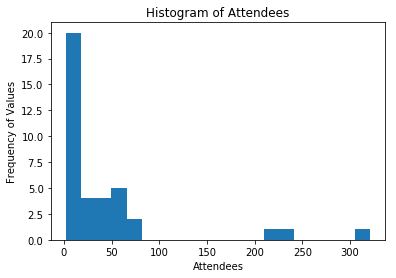

In [14]:
#now use the function to make a histogram
import matplotlib.pyplot as plt

ny = users_attending('us','newyork')

#Plot the distogram with hist() function
plt.hist(ny, bins = 20)

plt.xlabel('Attendees')
plt.ylabel('Frequency of Values')
plt.title('Histogram of Attendees')
plt.show()

## Bonus: Build object relations between artists, venues, and events with sqlalchemy!
Think about what each table should include - URLs, dates, etc.